# **Análise Estatística: Organizando e analisando dados de um Airbnb**

## **Importação e Exploração Inicial da Base**

In [40]:
#Importação de bibliotecas e do arquivo a ser analisado

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

listings = pd.read_csv("listings_cleaned.csv")
reviews = pd.read_csv("reviews.csv")

In [41]:
#Exploração das primeiras linhas com .head()

print("Listagens (listings_cleaned.csv):")
print(listings.head())

print("\nAvaliações (reviews.csv):")
print(reviews.head())

Listagens (listings_cleaned.csv):
       id neighbourhood_cleansed        room_type  accommodates  bathrooms  \
0  271975                Vidigal  Entire home/apt             4        1.0   
1  272335             Copacabana  Entire home/apt             4        1.0   
2  272631             Copacabana     Private room             2        1.0   
3  273261                 Leblon  Entire home/apt             6        3.5   
4  273363           Santa Teresa     Private room             1        1.0   

   bedrooms  beds   price  
0       2.0   2.0   236.0  
1       1.0   1.0   723.0  
2       1.0   2.0  1146.0  
3       3.0   3.0  6742.0  
4       1.0   1.0    61.0  

Avaliações (reviews.csv):
       id  number_of_reviews  review_scores_rating
0  272335                367                  4.92
1  272631                 32                  5.00
2  273363                  5                  5.00
3  273463                654                  4.83
4  273496                 60                  4

In [42]:
#Verificação dos tipos de dados e nome das colunas com .info()

listings.info()

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39499 non-null  int64  
 1   neighbourhood_cleansed  39499 non-null  object 
 2   room_type               39499 non-null  object 
 3   accommodates            39499 non-null  int64  
 4   bathrooms               36609 non-null  float64
 5   bedrooms                38976 non-null  float64
 6   beds                    36630 non-null  float64
 7   price                   36644 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 2.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32695 entries, 0 to 32694
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    32695 non-null  int64  
 1   number_of_reviews     32695 non-nu

In [43]:
#Verificação da quantidade de linhas e colunas com .shape ---> (linhas, colunas)

listings.shape

reviews.shape

(32695, 3)

In [44]:
#Unir os dois DataFrames em uma única base consolidada, utilizando a função pd.merge() com left (quando utilizado o inner ele removia as linhas que continham valores nulos e aí acabava com metade do exercício proposto)

df = pd.merge(
    listings,
    reviews,
    left_on='id',
    right_on='id',
    how='left'
)

#df.head(10)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39499 non-null  int64  
 1   neighbourhood_cleansed  39499 non-null  object 
 2   room_type               39499 non-null  object 
 3   accommodates            39499 non-null  int64  
 4   bathrooms               36609 non-null  float64
 5   bedrooms                38976 non-null  float64
 6   beds                    36630 non-null  float64
 7   price                   36644 non-null  float64
 8   number_of_reviews       32695 non-null  float64
 9   review_scores_rating    32695 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 3.0+ MB


## **Limpeza e Tratamento de Dados**

In [45]:
#Verificando a quantidade de valores ausentes por coluna

missing_values = df.isnull().sum()

print("Valores ausentes por coluna:\n")

print(missing_values[missing_values > 0])

Valores ausentes por coluna:

bathrooms               2890
bedrooms                 523
beds                    2869
price                   2855
number_of_reviews       6804
review_scores_rating    6804
dtype: int64


In [46]:
#Remove qualquer linha com valor nulo

df.dropna(inplace=True)

df.info()

linhas_nao_nulas = len(df)

<class 'pandas.core.frame.DataFrame'>
Index: 32695 entries, 1 to 39498
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      32695 non-null  int64  
 1   neighbourhood_cleansed  32695 non-null  object 
 2   room_type               32695 non-null  object 
 3   accommodates            32695 non-null  int64  
 4   bathrooms               32695 non-null  float64
 5   bedrooms                32695 non-null  float64
 6   beds                    32695 non-null  float64
 7   price                   32695 non-null  float64
 8   number_of_reviews       32695 non-null  float64
 9   review_scores_rating    32695 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 2.7+ MB


## **Tratando e Visualizando Outliers**

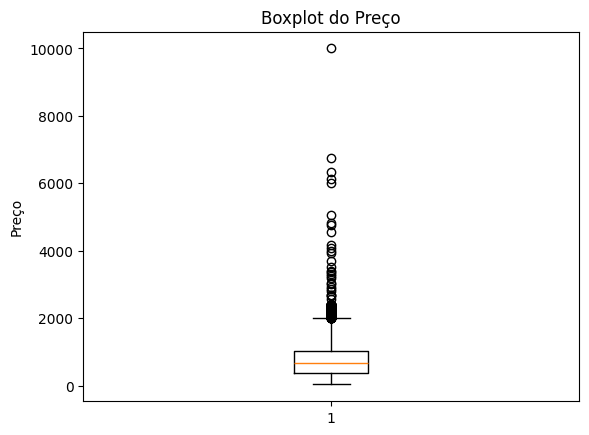

In [47]:
#Visualizando Outliers de Price

plt.boxplot(df['price'].dropna())
plt.title('Boxplot do Preço')
plt.ylabel('Preço')
plt.show()

In [48]:
#Calcular o IQR (Intervalo Interquartil)

# Calcular Q1 e Q3
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Limites para detecção de outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Limite inferior: {limite_inferior}")
print(f"Limite superior: {limite_superior}")

Q1: 386.0
Q3: 1036.0
IQR: 650.0
Limite inferior: -589.0
Limite superior: 2011.0


In [49]:
#Remover os outliers com base no IQR

df = df[(df['price'] >= limite_inferior) & (df['price'] <= limite_superior)]

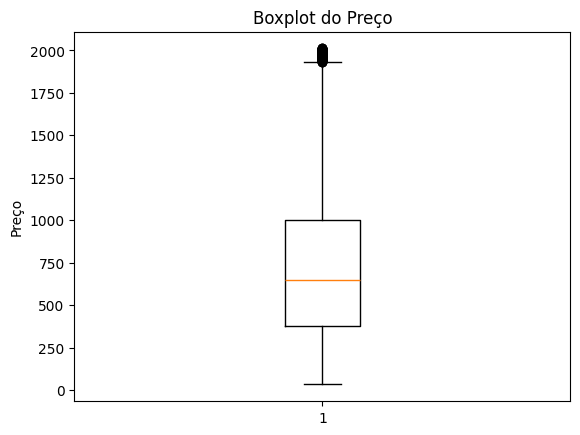

Número de registros após remoção dos outliers: 31772
Total de outliers removidos: 923


In [50]:
#Visualizando Remoção dos Outliers de Price

plt.boxplot(df['price'].dropna())
plt.title('Boxplot do Preço')
plt.ylabel('Preço')
plt.show()

print(f"Número de registros após remoção dos outliers: {len(df)}")
print(f"Total de outliers removidos: {linhas_nao_nulas - len(df)}")

## **Transformando Dados Categóricos**

In [ ]:
#Transformação de dados categóricos em novas colunas

category_cols = df.select_dtypes(include='object').columns

for col in category_cols:
    df[col + '_code'] = df[col].astype('category').cat.codes

df.head(5)

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,neighbourhood_cleansed_code,room_type_code
1,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0,367.0,4.92,31,0
2,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0,32.0,5.00,31,2
4,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0,5.0,5.00,120,2
5,273463,Lagoa,Entire home/apt,6,2.0,2.0,6.0,1411.0,654.0,4.83,74,0
6,273496,Leblon,Entire home/apt,6,2.5,2.0,5.0,703.0,60.0,4.80,76,0


In [68]:
#Criação de tabelas auxiliares para os dados categoricos normalizados

de_para_neighbourhood = df[['neighbourhood_cleansed', 'neighbourhood_cleansed_code']].drop_duplicates().reset_index(drop=True).sort_values(by='neighbourhood_cleansed_code')

de_para_room_type = df[['room_type', 'room_type_code']].drop_duplicates().reset_index(drop=True).sort_values(by='room_type_code')

print("Tabela De_Para de vizinhança: \n")
print(de_para_neighbourhood)
print("\nTabela De_Para de tipo de quarto: \n")
print(de_para_room_type)

Tabela De_Para de vizinhança: 

    neighbourhood_cleansed  neighbourhood_cleansed_code
91                Abolição                            0
57       Alto da Boa Vista                            1
80                 Andaraí                            2
68                    Anil                            3
123              Bancários                            4
..                     ...                          ...
120           Vila Militar                          147
78          Vila Valqueire                          148
100          Vila da Penha                          149
135                  Zumbi                          150
148             Água Santa                          151

[152 rows x 2 columns]

Tabela De_Para de tipo de quarto: 

         room_type  room_type_code
0  Entire home/apt               0
3       Hotel room               1
1     Private room               2
2      Shared room               3


In [72]:
#Remoção das colunas categóricas

colunas_categoricas = ['room_type', 'neighbourhood_cleansed']

df = df.drop(colunas_categoricas, axis='columns')

df.head()

,id,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,neighbourhood_cleansed_code,room_type_code
1,272335,4,1.0,1.0,1.0,723.0,367.0,4.92,31,0
2,272631,2,1.0,1.0,2.0,1146.0,32.0,5.00,31,2
4,273363,1,1.0,1.0,1.0,61.0,5.0,5.00,120,2
5,273463,6,2.0,2.0,6.0,1411.0,654.0,4.83,74,0
6,273496,6,2.5,2.0,5.0,703.0,60.0,4.80,76,0


## **Conferindo resultado final**

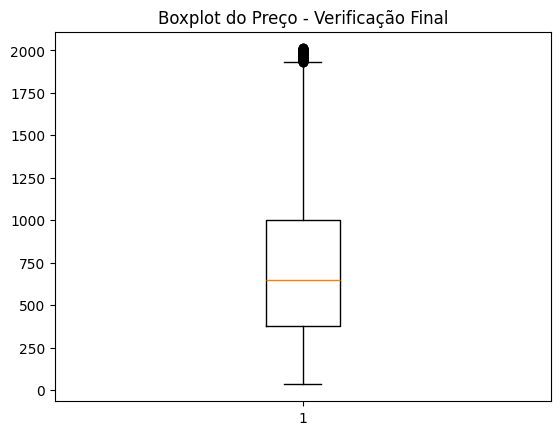

In [73]:
#Verificar se ainda há outliers

plt.boxplot(df['price'].dropna())
plt.title('Boxplot do Preço - Verificação Final')
plt.show()

In [74]:
#Inspeção Geral
print(df.head())
print(df.info())
print(df.describe())
print("Colunas do dataset:", df.columns.tolist())

       id  accommodates  bathrooms  bedrooms  beds   price  number_of_reviews  \
1  272335             4        1.0       1.0   1.0   723.0              367.0   
2  272631             2        1.0       1.0   2.0  1146.0               32.0   
4  273363             1        1.0       1.0   1.0    61.0                5.0   
5  273463             6        2.0       2.0   6.0  1411.0              654.0   
6  273496             6        2.5       2.0   5.0   703.0               60.0   

   review_scores_rating  neighbourhood_cleansed_code  room_type_code  
1                  4.92                           31               0  
2                  5.00                           31               2  
4                  5.00                          120               2  
5                  4.83                           74               0  
6                  4.80                           76               0  
<class 'pandas.core.frame.DataFrame'>
Index: 31772 entries, 1 to 39498
Data columns (to